<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/two_concepts/image_generation_two_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
get_ipython().system('pip install -q git+https://github.com/keras-team/keras-cv.git')
get_ipython().system('pip install -q tensorflow==2.11.0')
get_ipython().system('pip install pyyaml h5py')

In [ ]:
!git clone https://github.com/tensorflow-project/FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 1884, done.
remote: Counting objects: 100% (847/847), done.
remote: Compressing objects: 100% (366/366), done.
remote: Total 1884 (delta 625), reused 655 (delta 476), pack-reused 1037
Receiving objects: 100% (1884/1884), 127.23 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (1344/1344), done.


In [ ]:
import sys
import os
import numpy as np
from google.colab import drive
import urllib.request

### agree to mounting your Google Drive
drive.mount("/content/drive")

py_file_location = "/content/FineTuning/two_concepts"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion_two_concepts as txt

Mounted at /content/drive
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### load stable diffusion class and placeholder tokens from textual_inversion.py
stable_diffusion = txt.StableDiffusion()

### set the placeholder tokens
placeholder_token_broccoli = "<my-broccoli-token>"
placeholder_token_emoji = "<my-emoji-token>"
placeholder_token_combined = "<my-broccoli-emoji-token>"

### add the tokens to the stable diffusion model
txt.adding_token(stable_diffusion, placeholder_token_broccoli, placeholder_token_emoji, placeholder_token_combined)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
492466864/492466864 [==============================] - 3s 0us/step


In [ ]:
### for downloading weights from Dropbox:
### if you want to use any other service than Dropbox, change the code underneath

### Replace "<file_id>" and "<file_name>" with the ID and name of your file
### The file id is the string of characters between "s/" and the next slash "/"
### example: https://www.dropbox.com/s/yttja9ihaoq2xhd/35epochs_weights_with_two_concepts.npy?dl=0
file_id = 'yttja9ihaoq2xhd'

### name óf file
file_name = '35epochs_weights_with_two_concepts.npy'
url = f'https://www.dropbox.com/s/{file_id}/{file_name}?dl=1'
filename = f'{file_name}.npy'

In [ ]:
### Download the file from the URL and save it locally
urllib.request.urlretrieve(url, filename=filename)

### Load the saved numpy file using numpy.load()
weights = np.load(filename, allow_pickle=True)

### Set the weights of the text encoder
stable_diffusion.text_encoder.set_weights(weights)

In [ ]:
### choose how much of an emoji your broccoli sticker should include
percent = 0.3

### how many images are to be generated
number = 3

### choose a seed, use None for random genration
SEED = None

### insert your prompt here for just combining the tokens per prompt
prompt_combination = f" a {placeholder_token_broccoli} with {placeholder_token_emoji}"

### prompt for the two concepts "broccoli" and "emoji" combined by interpolation
prompt_interpolation = f"A happy {placeholder_token_combined}. "

txt.percentage_emoji(stable_diffusion, placeholder_token_broccoli, placeholder_token_emoji, placeholder_token_combined, percent)






31/31 [==============================] - 72s 2s/step


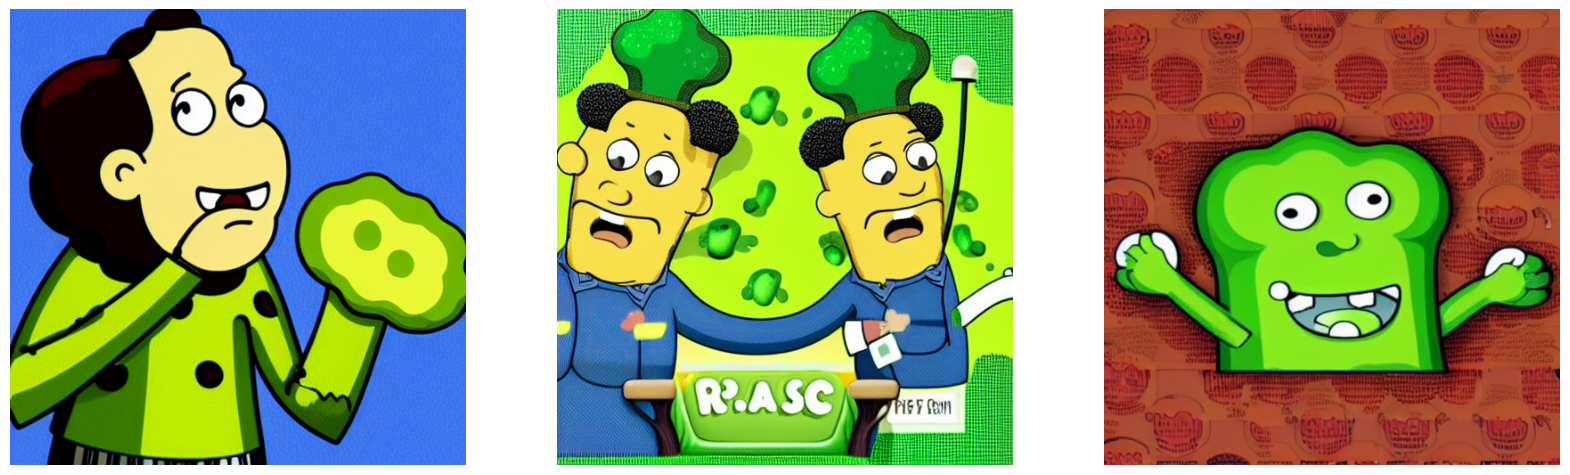

In [ ]:
### generate some examples and plot them according to our new concept and prompts
### with the combined tokens
generated = stable_diffusion.text_to_image(
    prompt_combination, batch_size = number, num_steps = 30, seed=SEED
)
txt.plot_images(generated)

25/25 [==============================] - 71s 3s/step


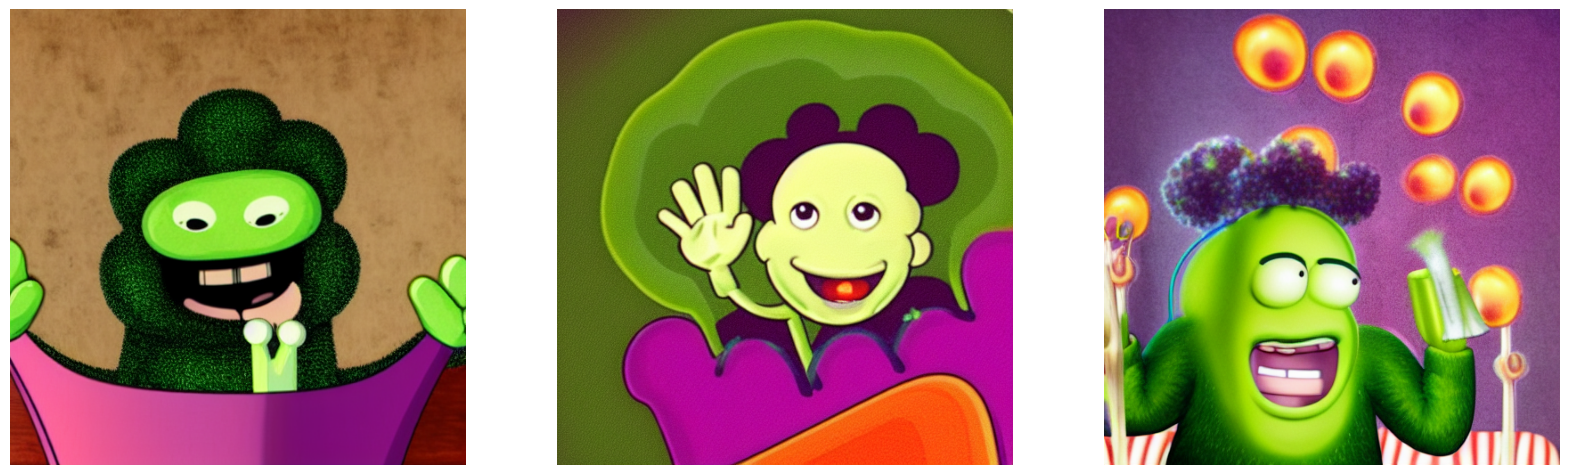

In [ ]:
### generate some examples and plot them according to our new concept and prompts
### with token interpolation
generated = stable_diffusion.text_to_image(
    prompt_interpolation, batch_size = number, num_steps = 30, seed=SEED
)
txt.plot_images(generated)

In [ ]:
### generate images and save them directly in your Google Drive
### where to store your images, you may have to create the folder "Images" first
drive_folder = '/content/drive/MyDrive/Images/'

###choose whether you want to use the interpolation prompt or the combined prompt
txt.image_generation(prompt_interpolation, drive_folder, number, stable_diffusion, seed=SEED)

31/31 [==============================] - 38s 1s/step
